# This file contains hiring statics for a experience of candidate,his written test score and personal interview score.Based on these 3 factors ,HR will decide the salary.Given this data we need to build a machine learning model for HR department that can help them decide salaries for future candidate.Using this predict salaries for-1. 2yr experience,9 test score,6 interview score and 2. 12 yr experience , 10 testscore 10 interview score

    

In [1]:
### IMPORT ALL MODULES
import pandas as pd
import numpy as np


In [2]:
#### IT RETURNS THE ABOSLUTE PATH OF THE WORKING DIRECTORY PROCESS
import os
os.getcwd()

'C:\\Users\\wel'

# FIRST THING IS TO UPLOAD CSV FILE.AND USING pd.read_csv WE READ OUR CSV FILE.

In [3]:
df=pd.read_csv('hiring.csv')


In [4]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


# NOW COLLECT DATA USING DIFFERENT PANDAS FUNCTION

In [5]:
### GIVE INFORMATION ABOUT DATA WITH MEMORY USAGE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [6]:
### GIVE STATISTICAL INFORMATION 
df.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [7]:
### GIVE STATISTICAL INFORMATION OF OBJECT TYPE DATATYPE
df.describe(include='object')

,experience
count,6
unique,6
top,seven
freq,1


In [8]:
### CHECK NULL VALUES IF HAVING AND USING SUM IT GIVE TOTAL NUMBER OF NULL VALUES IN EACH COLUMN
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

# AFTER DATA COLLECT ,WE MOVED TO DATA WRANGLING MEANS CLEANING OF DATA

In [9]:
### USING FILLNA METHOD WE FILL MISSING VALUES AND FFILL IS APPLIED ACROSS THE COLUMN AXIS ,THEN MISSING VALUE ARE FILLED BY THE VALUE IN PREVIOUS COLUMN IN THE SAME ROW 
df["test_score(out of 10)"].fillna( method ='ffill', limit = 1, inplace = True) 
  

In [10]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [11]:
df['experience'].fillna('zero',limit=2,inplace=True)

In [12]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


# BEFORE MOVING TO ALGORITHM ,OUR FIRST TASK IS TO CHECK IS ANY COLUMN HAVING STR TYPE IF IT IS THEN CONVERT THAT COLUMN INTO NUMERIC TYPE. SO WE CAN SEE THAT EXPERIENCE COLUMN HAVING STR TYPE (DIGITS ARE IN WORD FORMAT).SO CONVERT INTO NUMBER FORMAT USING WORD_TO_NUMBER

In [13]:
conda install -c conda-forge word2number

Solving environment: ...working... done

## Package Plan ##

  environment location: E:\anacon

  added / updated specs:
    - word2number


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.5-py37_0 --> conda-forge::conda-4.8.5-py37hf50a25e_2


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


# BEFORE CONVERTING INSTALL MODULE AS ABOVE SHOWN OTHERWISE WE GET ERROR OF NOT FOUND MODULE.

In [14]:

conda update -n base -c defaults conda


Solving environment: ...working... done

## Package Plan ##

  environment location: E:\anacon

  added / updated specs:
    - conda


The following packages will be REMOVED:

  python_abi-3.7-1_cp37m

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.5-py37hf50a25e~ --> pkgs/main::conda-4.8.5-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [15]:
#### IMPORT MODULE AND USING APPLY FUNCTION WE IMPLEMENT WORD TO NUMBER CONVERSION 
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)
df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


# IMPLEMENT MACHINE LEARNING ALGORITHM USING SK LEARN  

In [16]:
#### IMPORT LIBRARIES  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X=df.drop('salary($)',axis=1)

In [18]:
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [19]:
Y=df['salary($)']

In [20]:
Y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

# NOW USING TRAIN AND TEST SPLIT WE SPLIT OUR DATA FOR TRAINING AND TESTING. TEST SIZE WE HAVE INIATLISE IS 20% MEANS TRAIN SIZE WII BE 80%

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [22]:
X_train

,experience,test_score(out of 10),interview_score(out of 10)
1,0,8.0,6
7,11,7.0,8
3,2,10.0,10
0,0,8.0,9
5,3,7.0,10
4,7,9.0,6


In [23]:
X_test

,experience,test_score(out of 10),interview_score(out of 10)
6,10,7.0,7
2,5,6.0,7


In [24]:
Y_train

1    45000
7    80000
3    65000
0    50000
5    62000
4    70000
Name: salary($), dtype: int64

In [25]:
Y_test

6    72000
2    60000
Name: salary($), dtype: int64

In [26]:
#### INSTANCES OF LINEARREGRESSION
reg=LinearRegression()

In [27]:
#### TO FIT TRAIN DATA
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
predict=reg.predict(X_test)

In [29]:
predict

array([75610.57559901, 57496.5574222 ])

In [30]:
model_score=reg.score(X_test,Y_test)

In [31]:
#### ACCURACY
model_score

0.7318960986595965

# HERE WE PREDICT SALARY OF CANDIDATE HAVING 2YR EXPERIENCE,9 TEST SCORE AND 6 INTERVIEW SCORE

In [32]:
predict=reg.predict([[2,9,6]])

In [33]:
predict

array([53715.78077665])

# HERE WE PREDICT SALARY OF CANDIDATE HAVING 12YR EXPERIENCE,10 TEST SCORE AND 10 INTERVIEW SCORE¶

In [34]:
predict=reg.predict([[12,10,10]])

In [35]:
predict

array([96106.30680253])

# DATA VISUALISATION

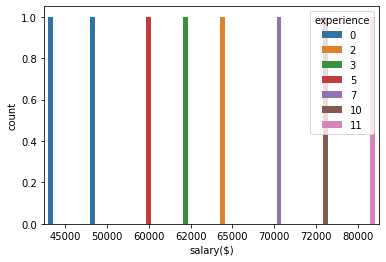

In [38]:
import seaborn as sns
sns.countplot(x='salary($)',data=df,hue='experience')

# CANDIDATE HAVING MORE EXPERIENCE  HAVING MORE SALARY 

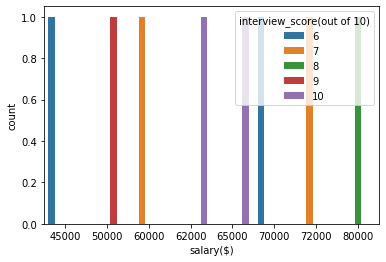

In [39]:
sns.countplot(x='salary($)',data=df,hue='interview_score(out of 10)')